# Классификация сахарного диабета с помощью kNN

Необходимо предсказать, есть ли у индейских женщин диабет или нет, на основе информации, такой как артериальное давление, индекс массы тела (ИМТ), возраст и т. д.

Этот набор данных изначально получен из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из большей базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года.

Ниже описаны признаки, которые помогут нам предсказать, является ли человек диабетиком или нет:

* **Pregnancies**: количество беременностей
* **Glucose**: Концентрация глюкозы в плазме в течение 2 часов при пероральном тесте на толерантность к глюкозе. Менее 140 мг/дл считается нормальным уровнем глюкозы.
* **BloodPressure**: диастолическое артериальное давление (мм рт. ст.). 120/80 — нормальный уровень АД для женщин старше 18 лет.
* **SkinThickness**: Толщина кожной складки трицепса (мм)
* **Insulin**: 2-часовой сывороточный инсулин (мЕд/мл). 16-166 мМЕ/л считается нормальным уровнем инсулина.
* **BMI**: индекс массы тела (вес в кг/(рост в м)2)
* **DiabetesPedigreeFunction**: Функция родословной диабета (функция, которая оценивает вероятность диабета на основе семейного анамнеза).
* **Age**: Возраст (лет)
* **Outcome**: переменная класса (0, если нет диабета, 1, если диабет)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [84]:
diabetes_data = pd.read_csv('diabetes.csv')

In [85]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
diabetes_data.shape

(768, 9)

In [87]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [89]:
diabetes_data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

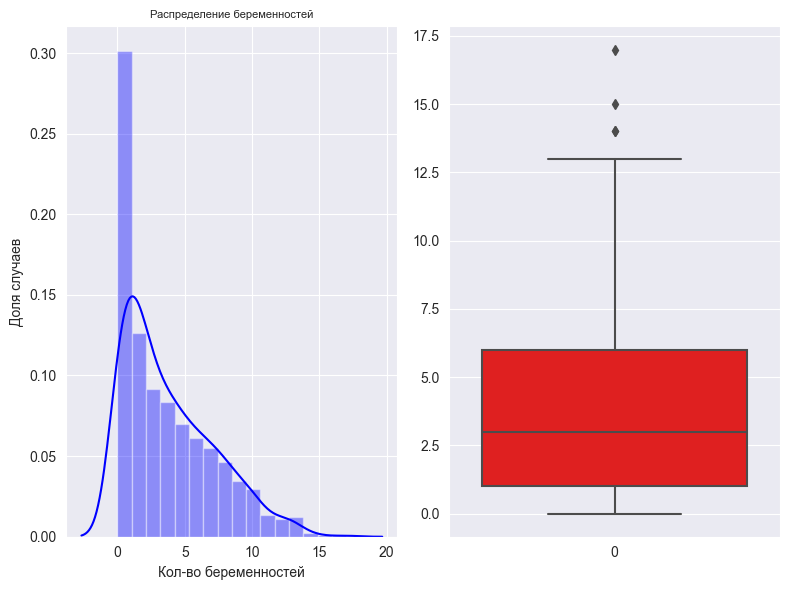

In [90]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Распределение беременностей',fontdict={'fontsize':8})
axes[0].set_xlabel('Кол-во беременностей')
axes[0].set_ylabel('Доля случаев')
plt.tight_layout()


plot01=sns.boxplot(data=diabetes_data['Pregnancies'],ax=axes[1],orient = 'v', color='r')
plt.tight_layout()

In [91]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [92]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [93]:
total = diabetes_data.isnull().sum().sort_values(ascending=False)
percent = ((diabetes_data.isnull().sum()/diabetes_data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(9)

,Total,Percent
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042
Pregnancies,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


Text(0.5, 1.0, 'Процент утерянных данных по признаку')

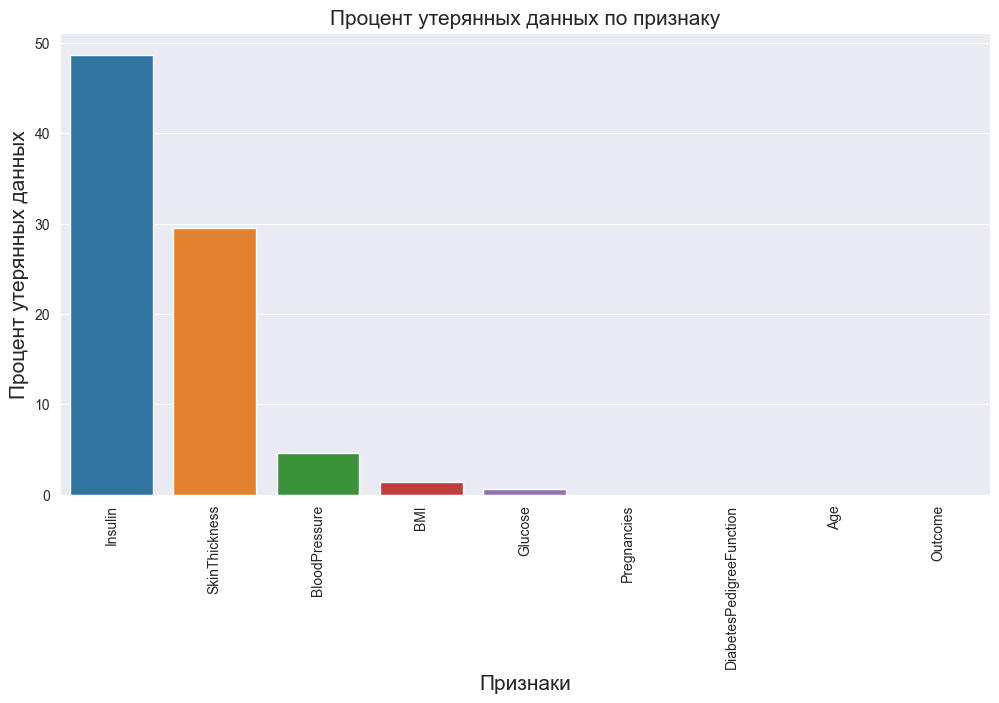

In [94]:
f, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Признаки', fontsize=15)
plt.ylabel('Процент утерянных данных', fontsize=15)
plt.title('Процент утерянных данных по признаку', fontsize=15)

In [95]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


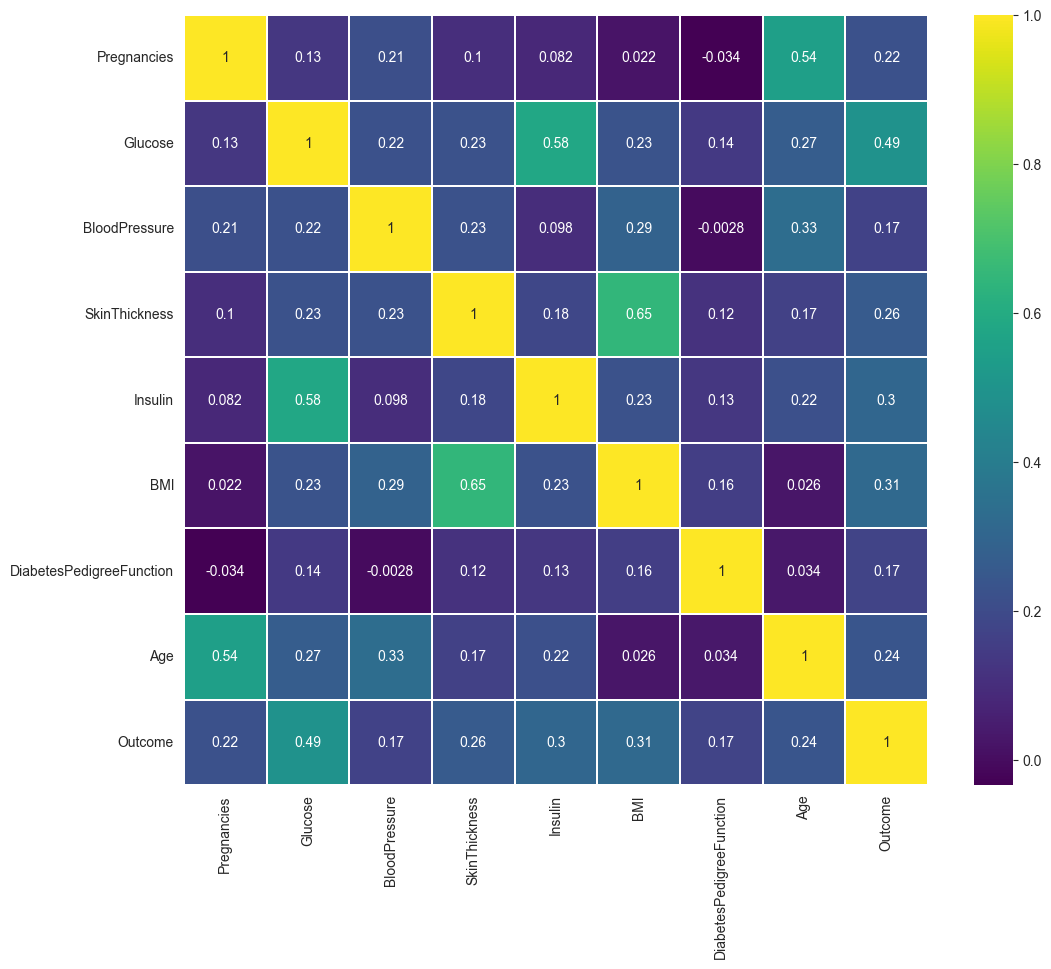

In [96]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_data.corr(),annot=True, cmap='viridis',linewidths=.1)
plt.show()

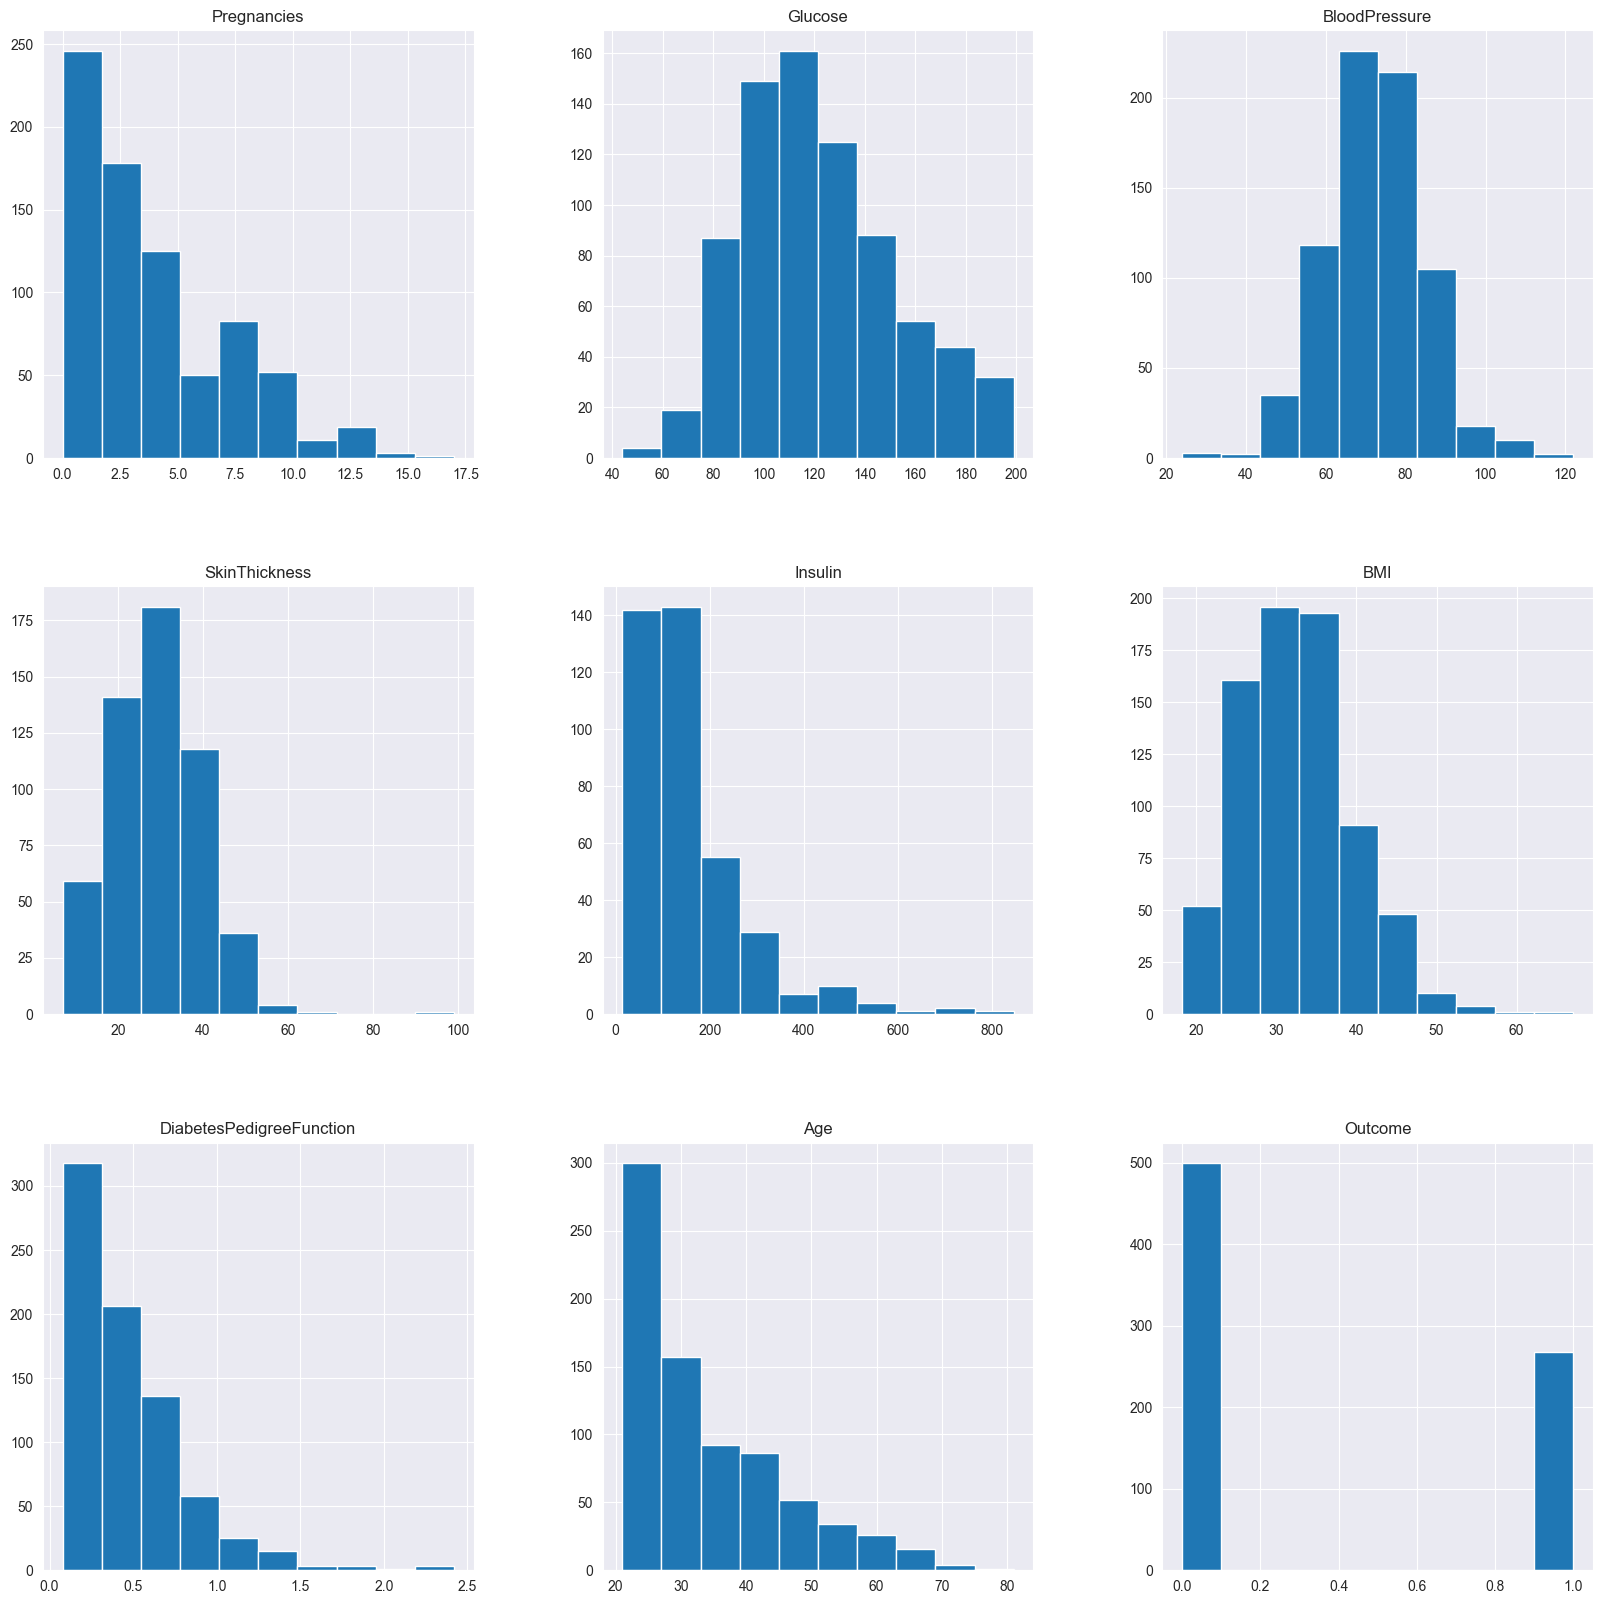

In [97]:
diabetes_data.hist(figsize = (20,20))
plt.show()

In [98]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

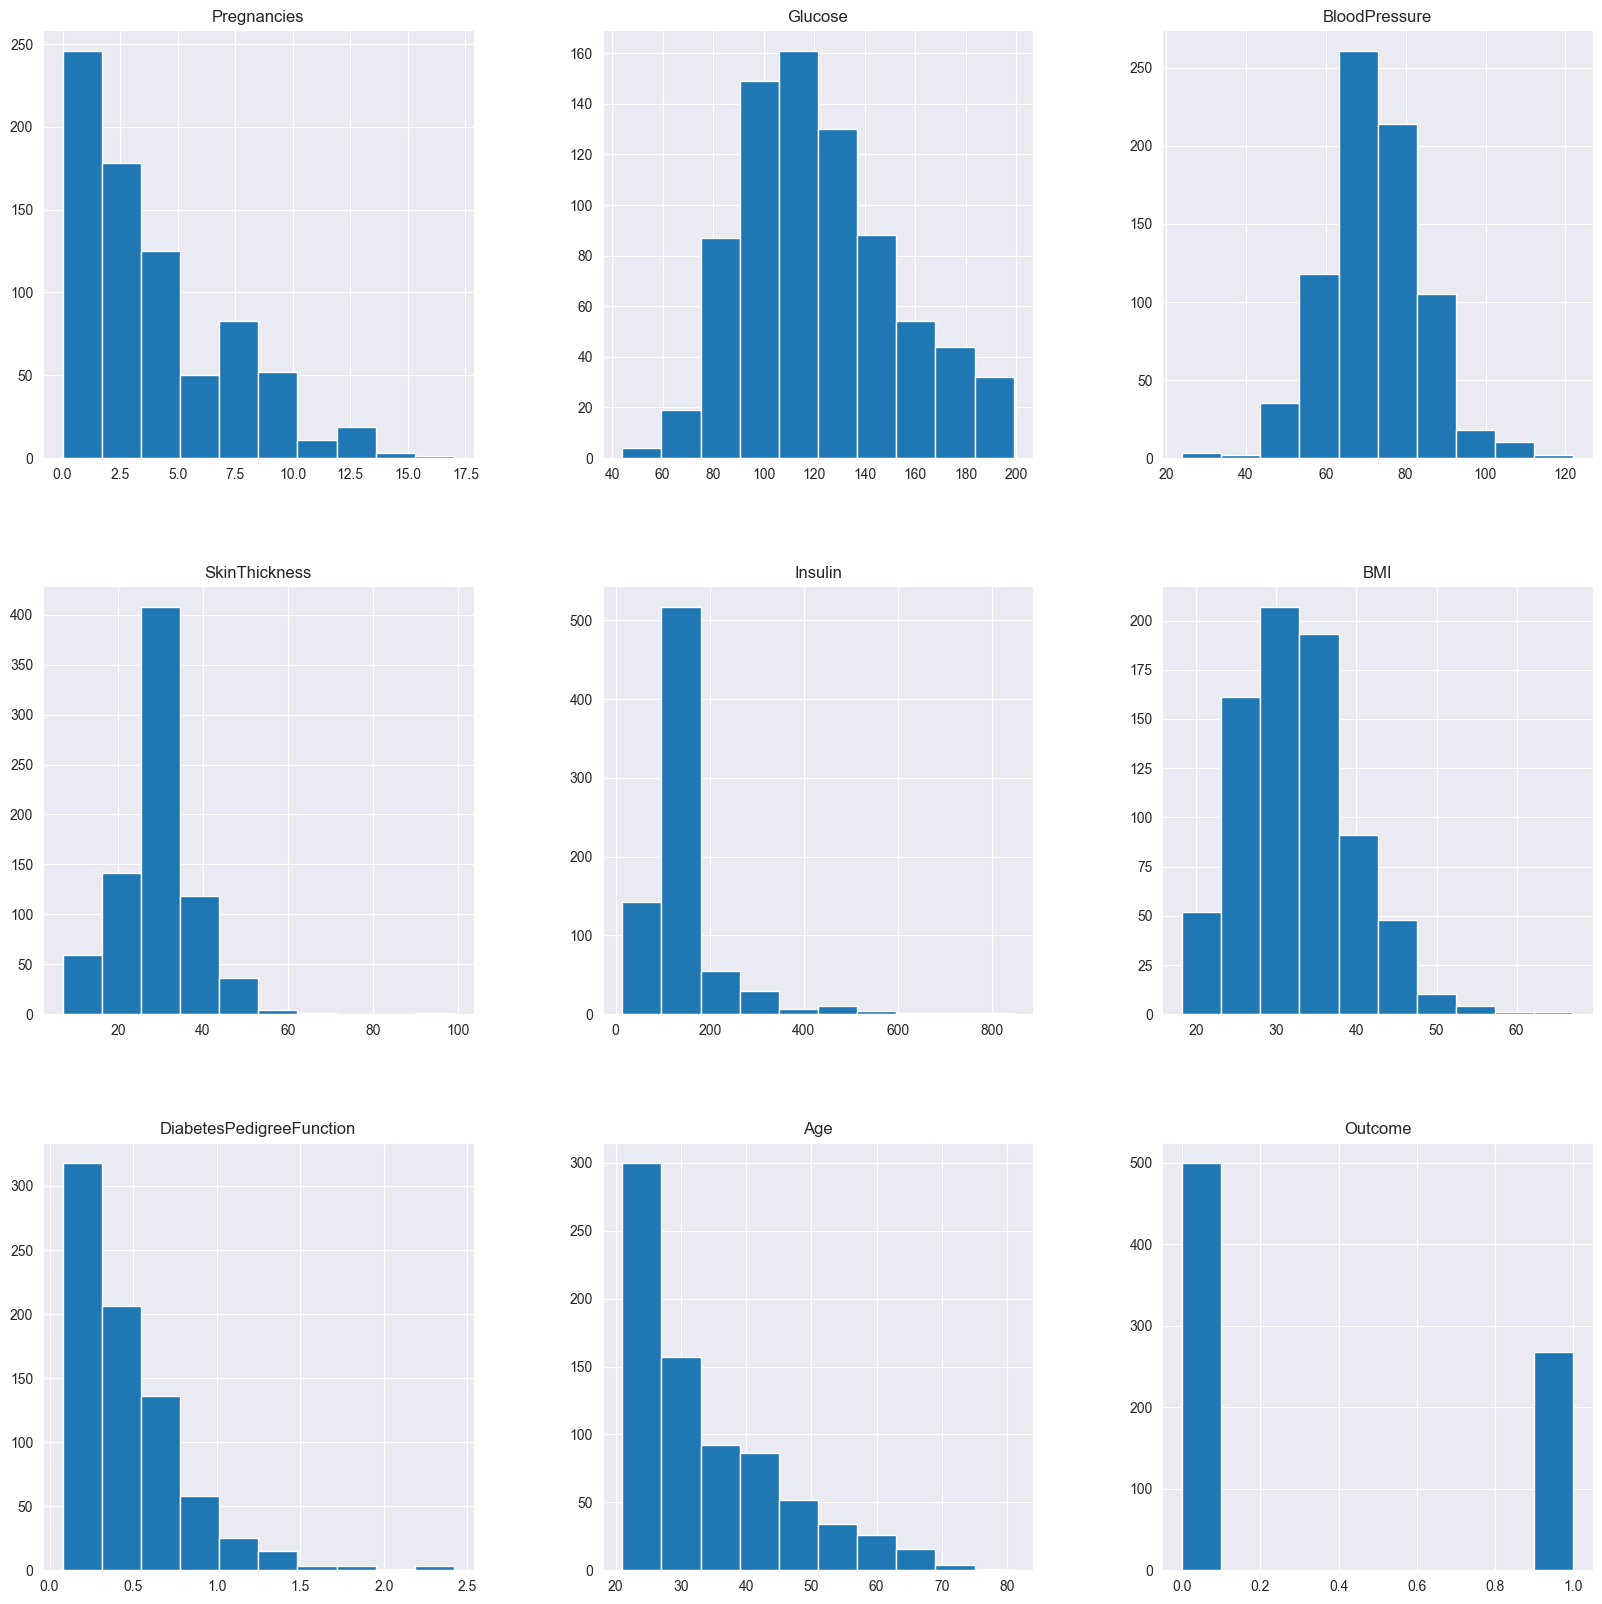

In [99]:
diabetes_data.hist(figsize = (20,20))
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


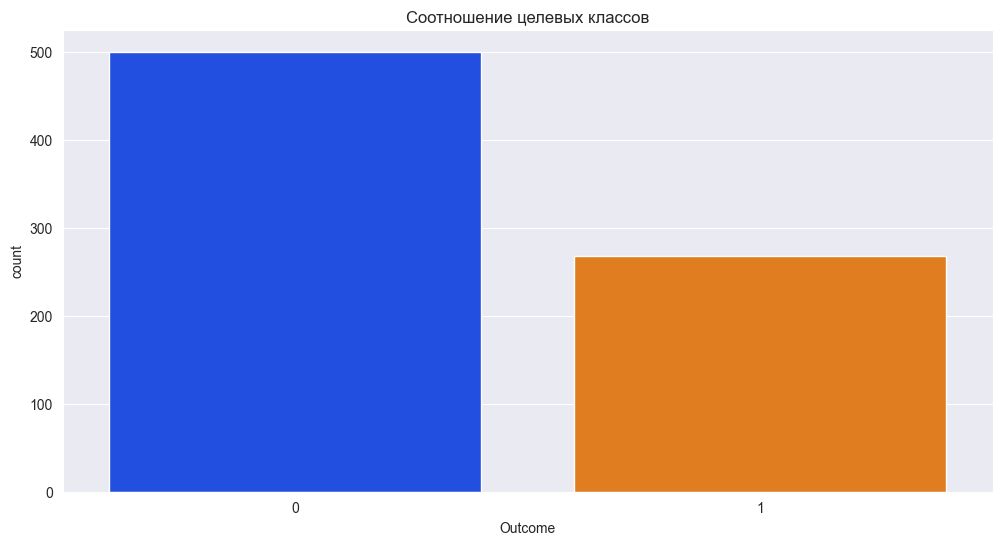

In [100]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Соотношение целевых классов")

print(diabetes_data['Outcome'].value_counts())

Всего в базе данных зарегистрировано 768 женщин. 268 женщин, около 35%, страдали диабетом, в то время как 500 женщин, около 65%, не болели.
Приведенный выше график показывает, что набор данных смещен в сторону пациентов, не страдающих диабетом. Число не диабетиков почти в два раза превышает количество больных диабетом.

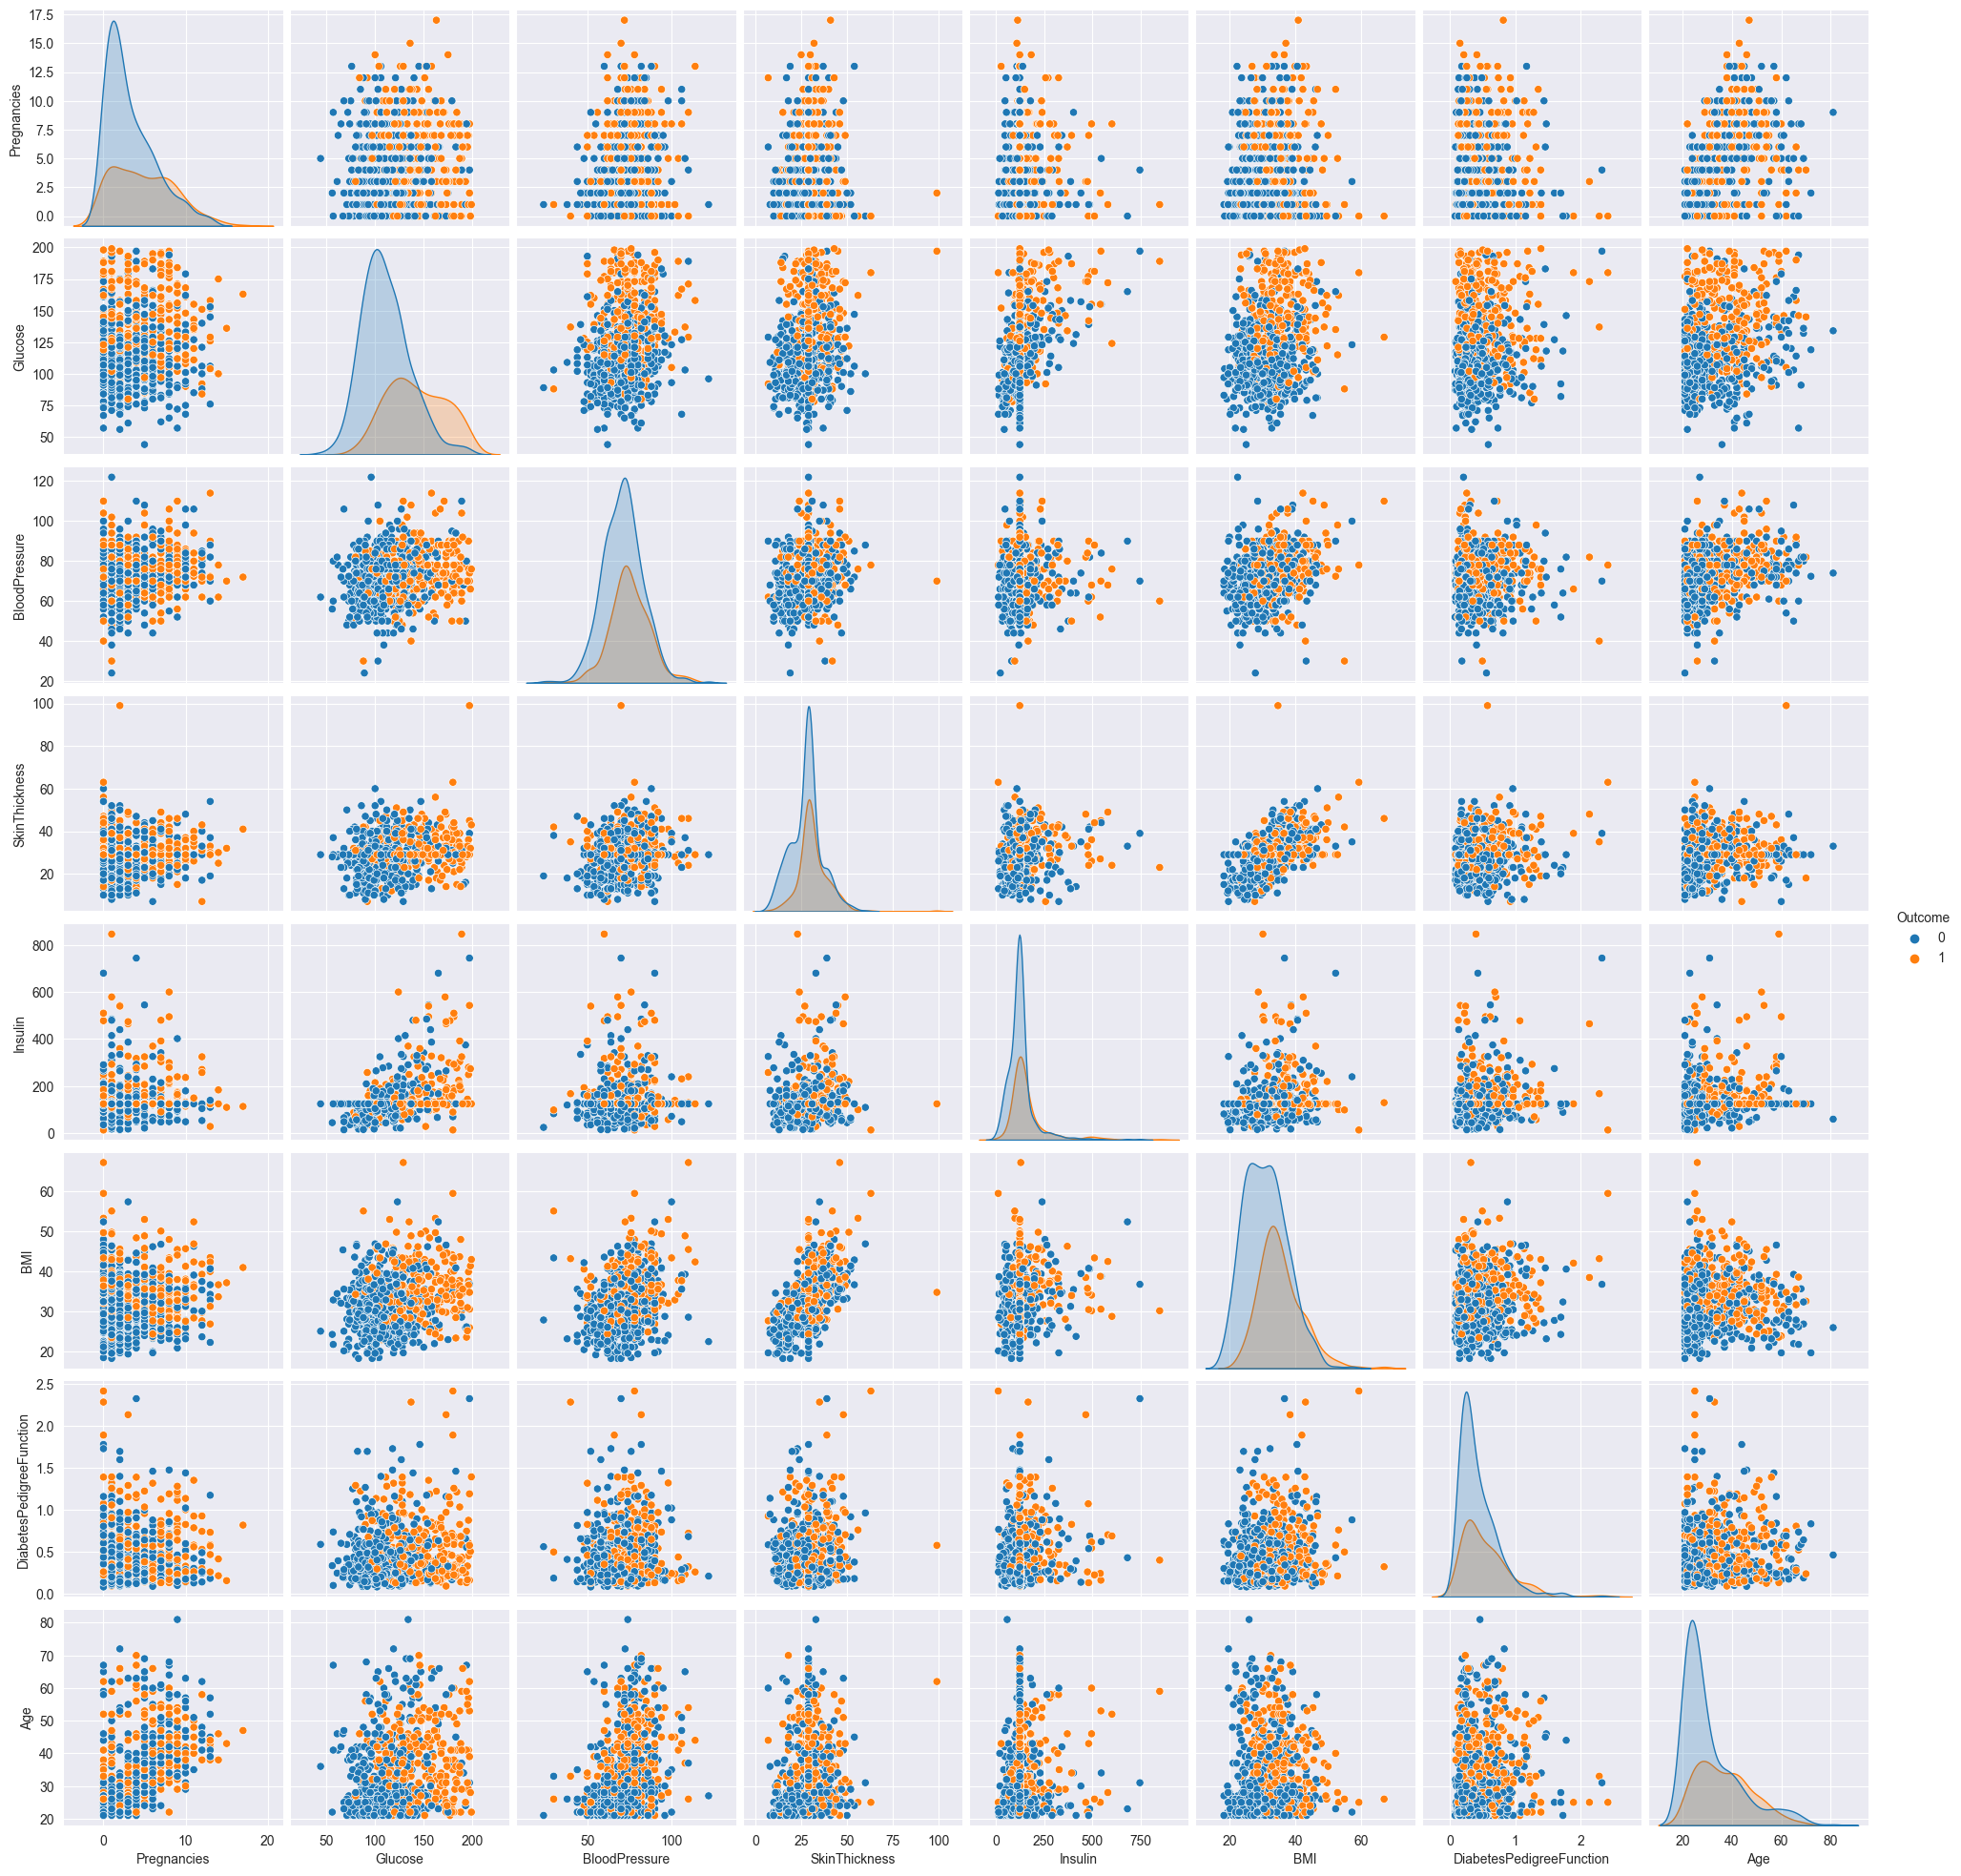

In [101]:
sns.pairplot(diabetes_data,hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

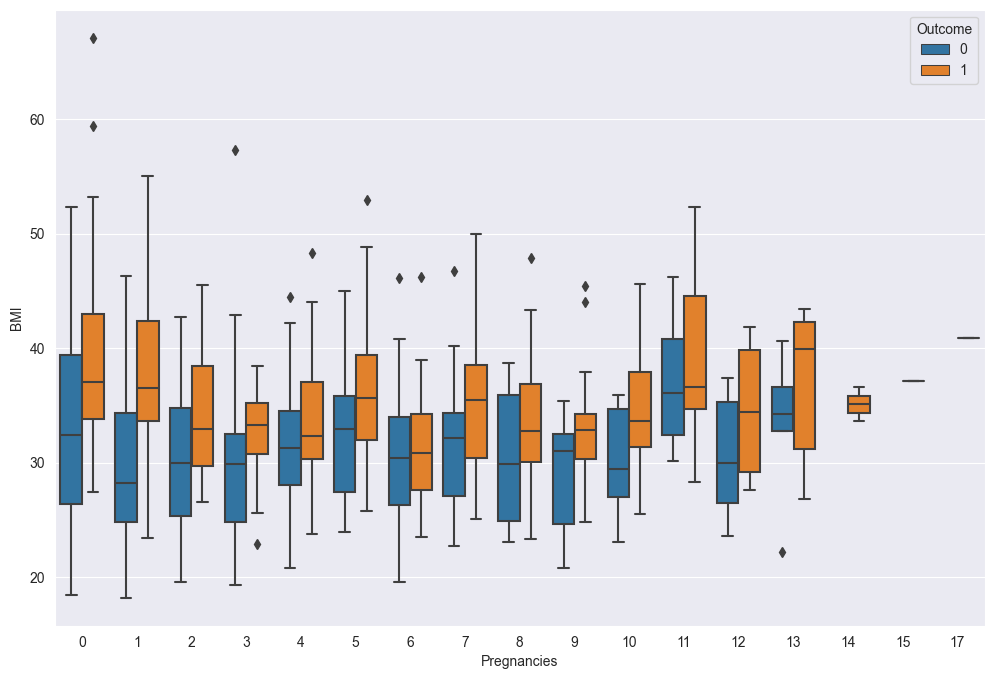

In [102]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pregnancies', y='BMI',data=diabetes_data, hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

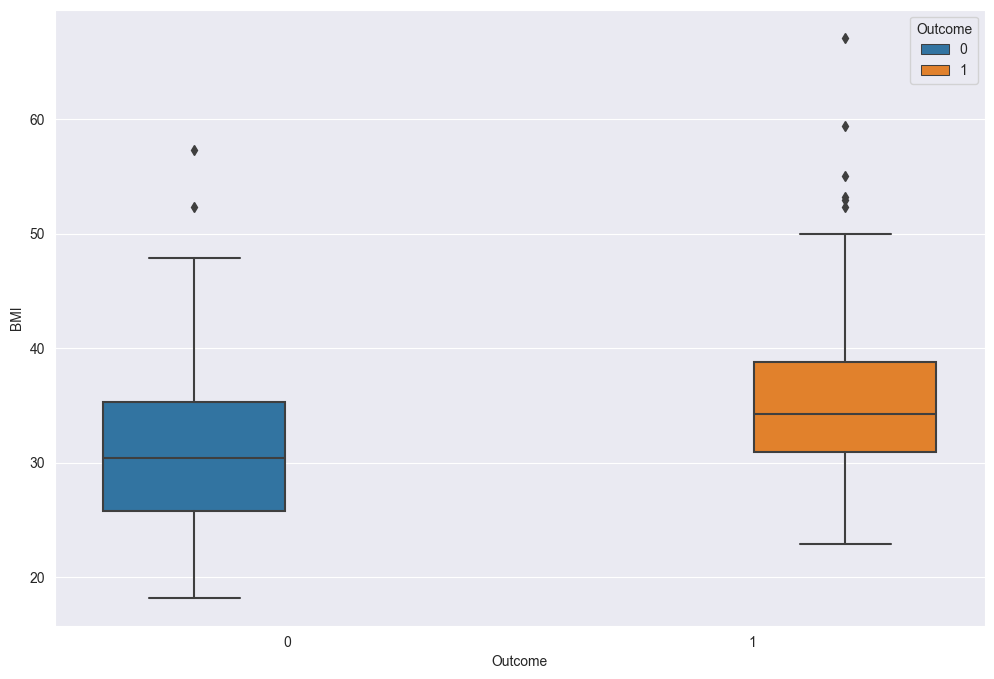

In [103]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

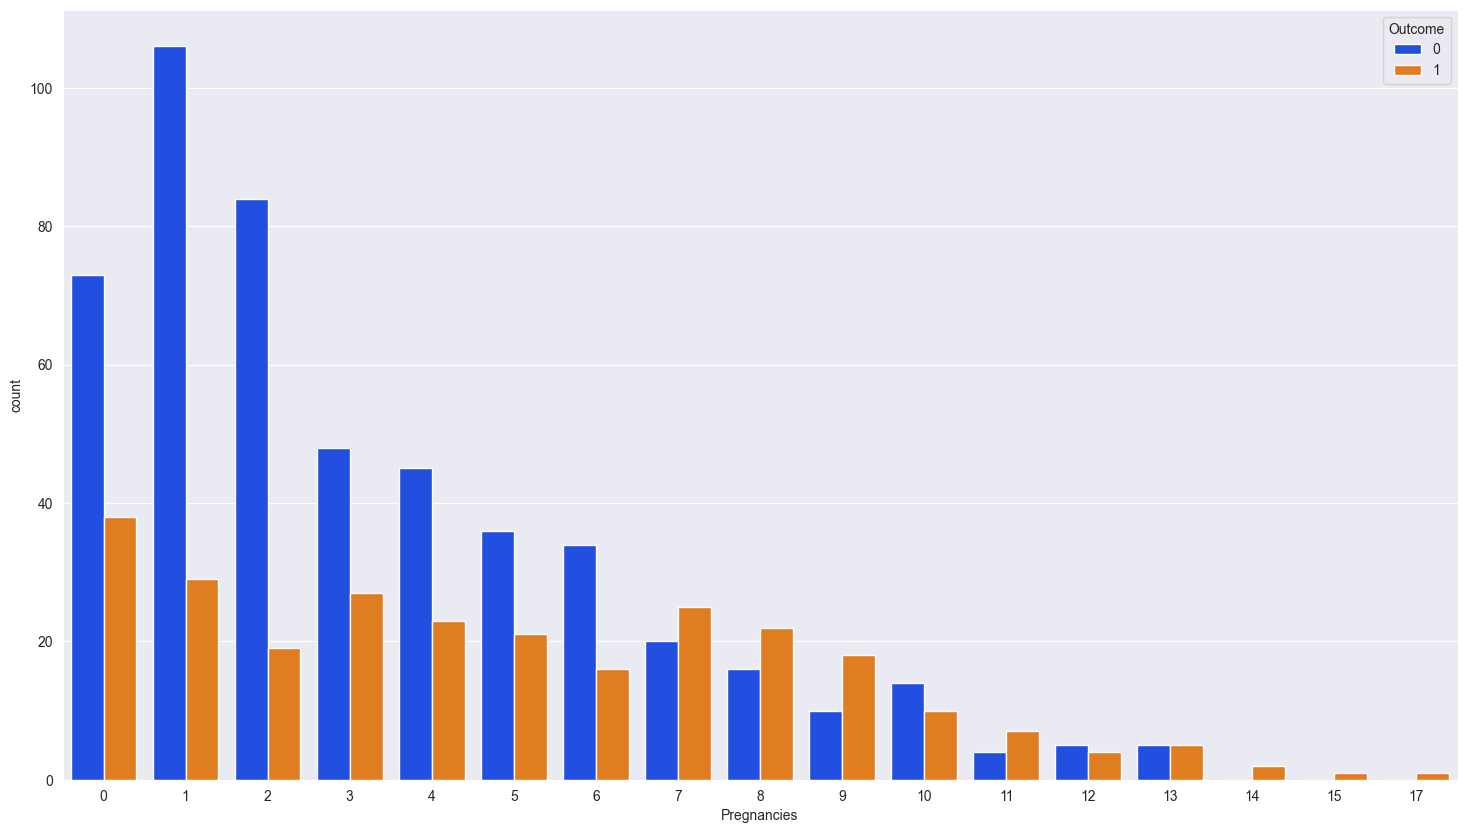

In [104]:
plt.figure(figsize=(18,10))
sns.countplot(x='Pregnancies',data=diabetes_data,hue = 'Outcome', palette='bright')

ИМТ, как правило, будет выше у женщин, у которых было больше беременностей, а также у тех, у кого положительный результат теста на диабет, и что взаимосвязь между функцией родословной и результатами теста покажет, что те, у кого была более высокая функция родословной, дали положительный результат, а те у которых была более низкая родословная функция, дал отрицательный результат.

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

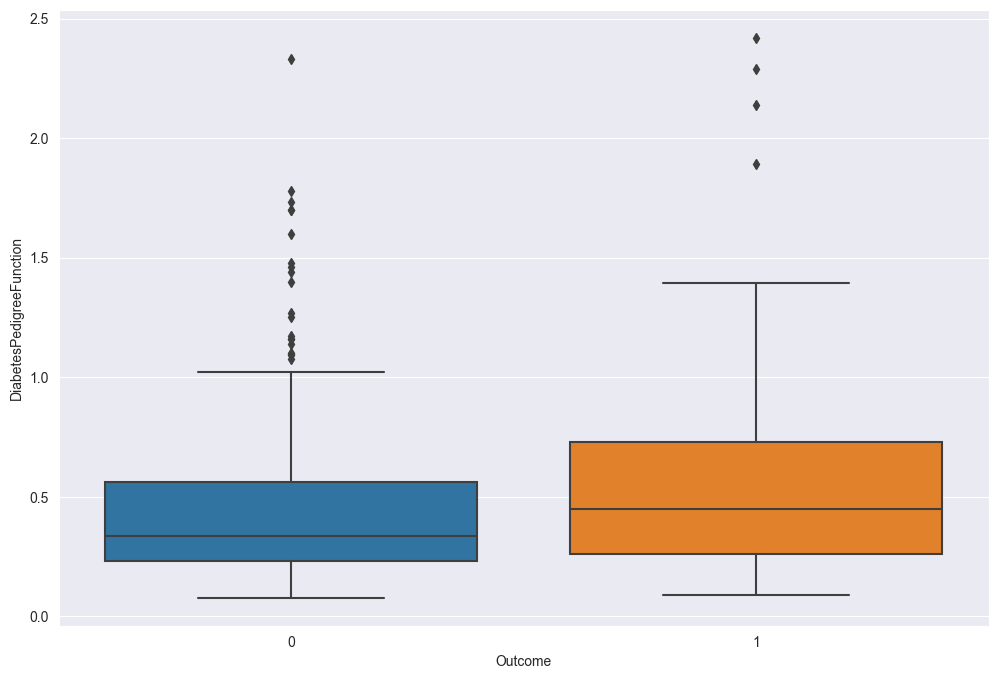

In [105]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction',data=diabetes_data)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

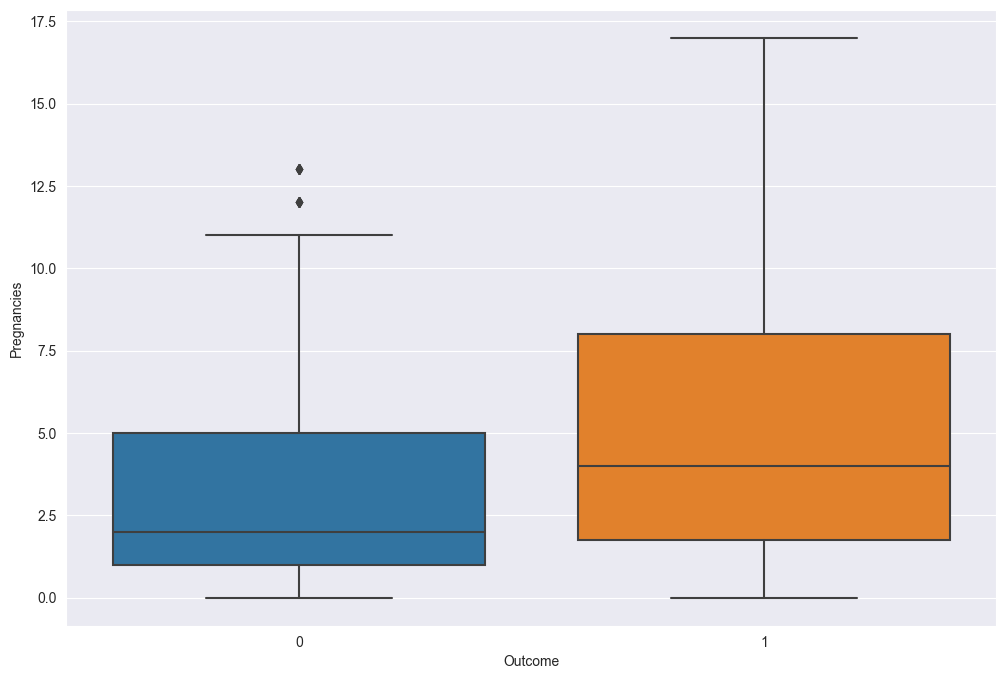

In [106]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Pregnancies',data=diabetes_data)

Среднее число беременностей выше (4,9) у женщин с диабетом по сравнению с (3,3) у женщин без диабета

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

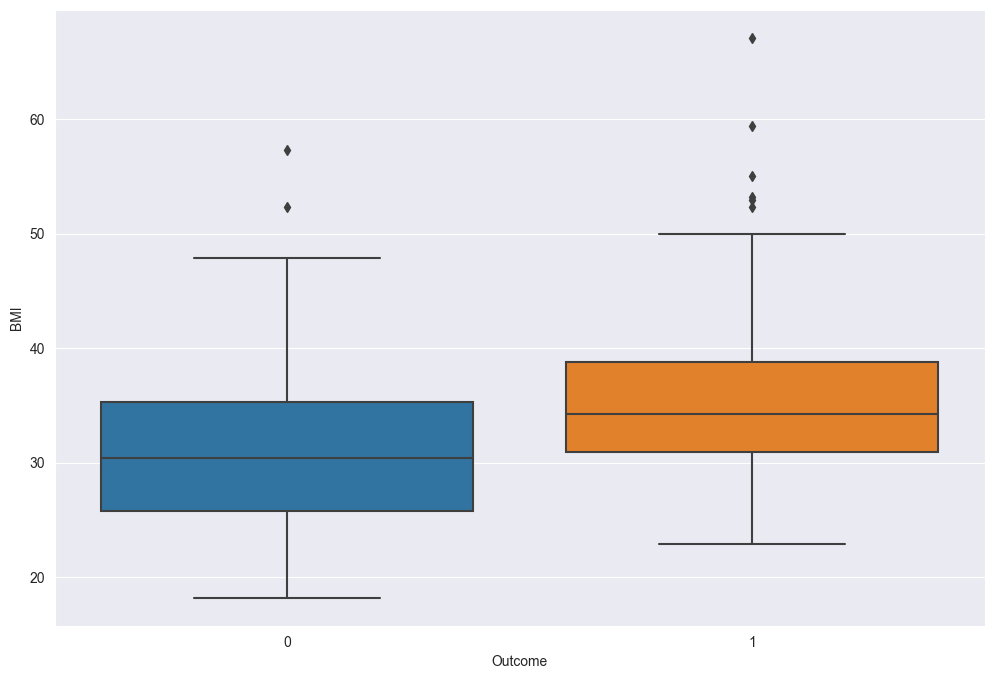

In [107]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data)

Какова вероятность диабета у женщин с нормальным ИМТ. Диапазон нормального ИМТ составляет от 18,5 до 25.

In [108]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

0    101
1      7
Name: Outcome, dtype: int64

In [109]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

0    399
1    261
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

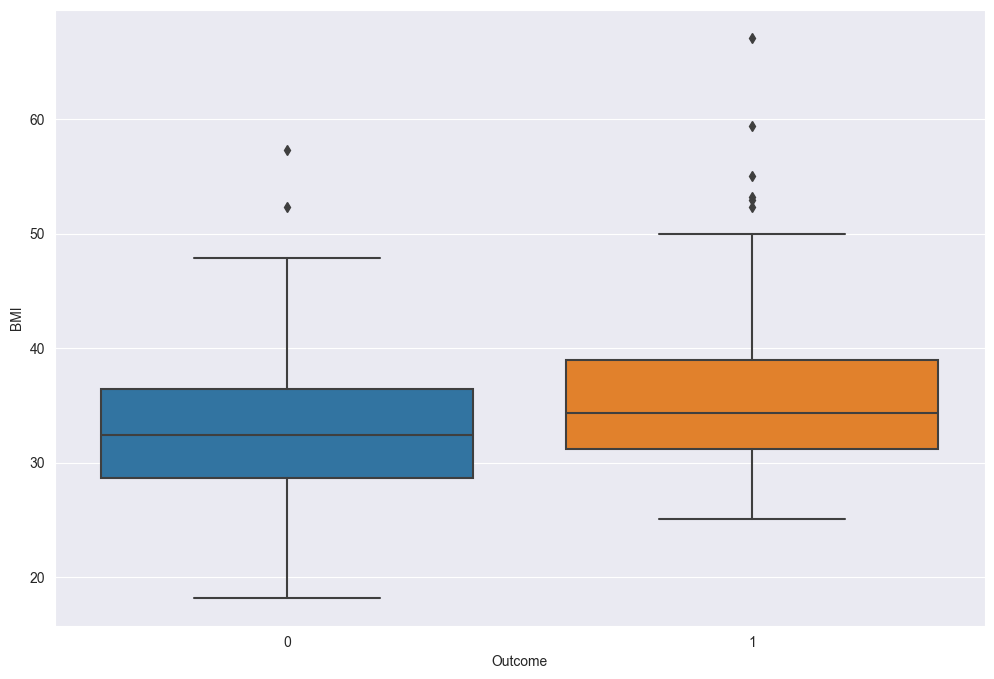

In [110]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

Индекс массы тела (ИМТ) показал значительную связь с возникновением диабета и что даже у женщин с нормальным весом риск заболеть диабетом почти в 9 раз выше, чем у женщин с избыточным весом.

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

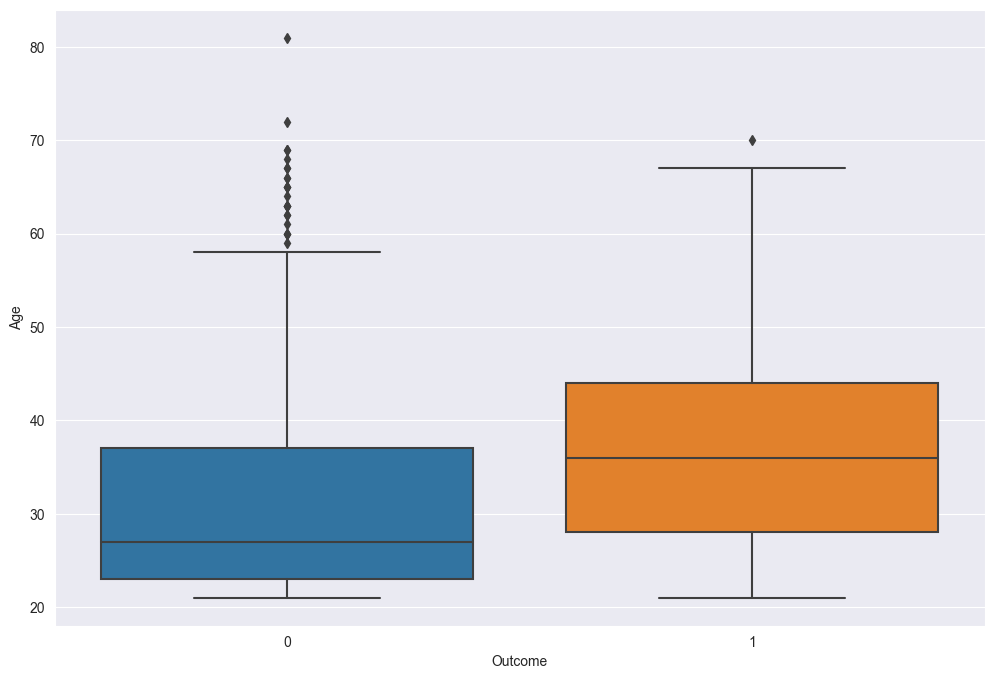

In [111]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Age',data=diabetes_data)

In [112]:
diabetes_data['Age'].value_counts().head()

22    72
21    63
25    48
24    46
23    38
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

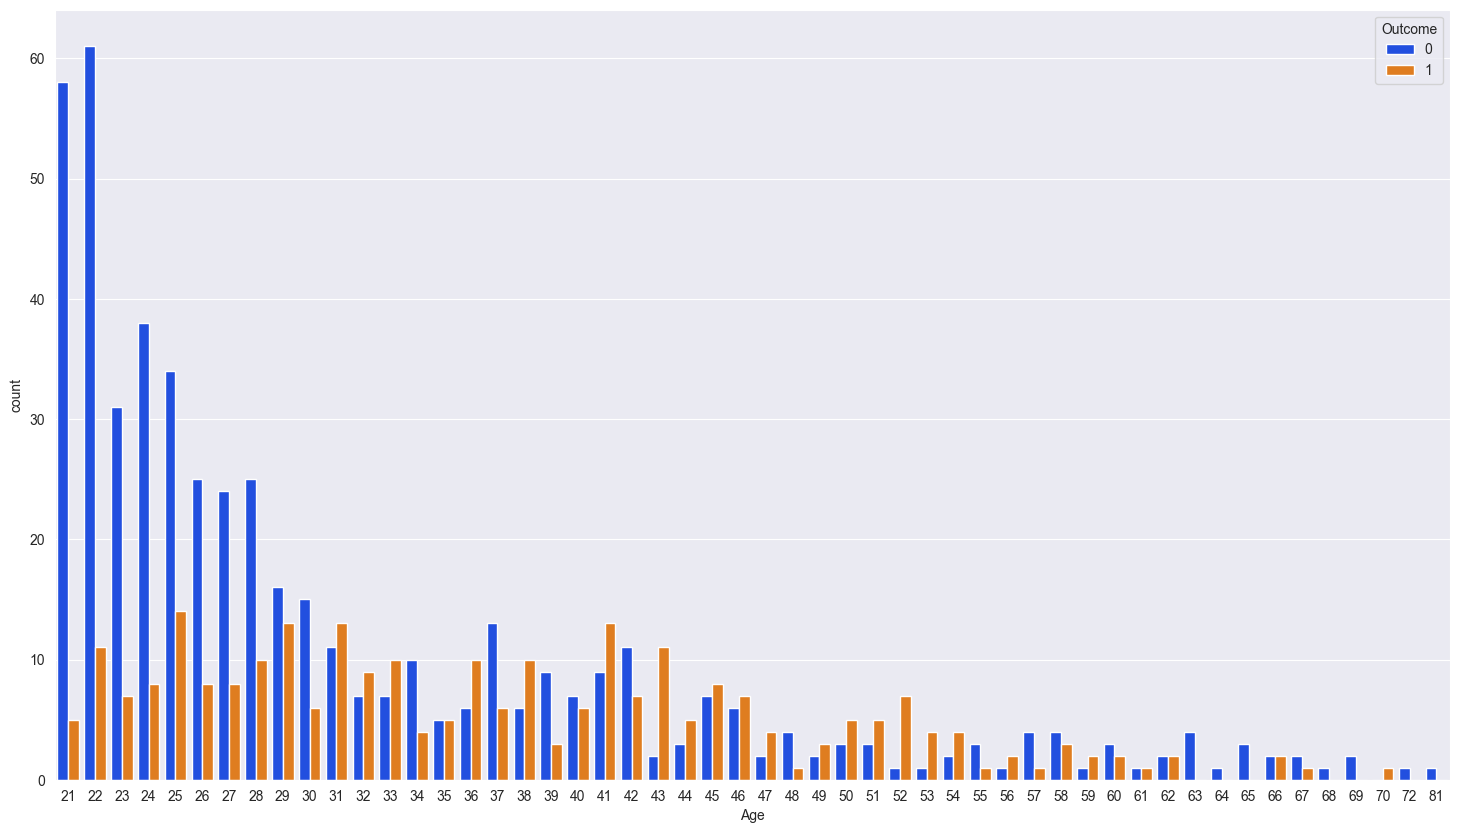

In [113]:
plt.figure(figsize=(18,10))
sns.countplot(x='Age',data=diabetes_data,hue = 'Outcome', palette='bright')

Можно увидеть значительную связь между возрастным распределением и возникновением диабета. Женщины в возрастной группе > 31 года подвергались более высокому риску заболеть диабетом по сравнению с более молодой возрастной группой.

## Классификация с использованием kNN

### Нормализация

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

StandardScaler()

In [116]:
scaled_features = scaler.transform(diabetes_data.drop('Outcome',axis=1))

In [117]:
df_feat = pd.DataFrame(scaled_features,columns=diabetes_data.columns[:-1])

In [118]:
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


### Создание тренировочной и тестовой выборок

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,diabetes_data['Outcome'],
                                                    test_size=0.20,random_state=101)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(n_neighbors=1)

In [123]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [124]:
pred = knn.predict(X_test)

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
print(confusion_matrix(y_test,pred))

[[77 26]
 [18 33]]


In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       103
           1       0.56      0.65      0.60        51

    accuracy                           0.71       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.73      0.71      0.72       154



### Варианты подбора значения k блжиайших соседей

In [128]:
error_rate = []
test_scores = []
train_scores = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Ошибка')

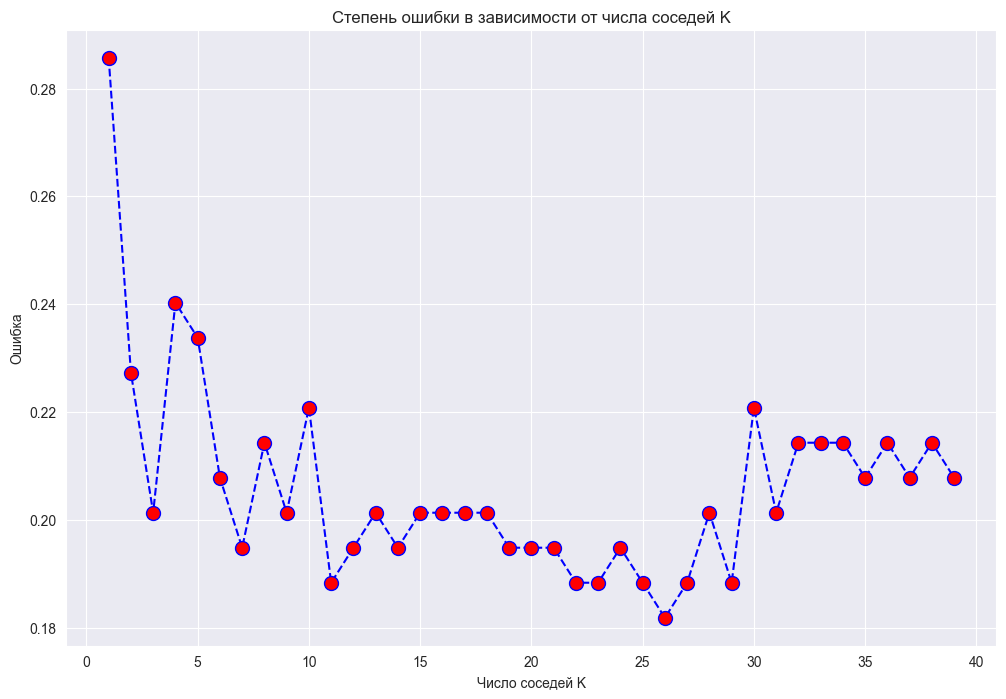

In [129]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Степень ошибки в зависимости от числа соседей K')
plt.xlabel('Число соседей K')
plt.ylabel('Ошибка')

In [130]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [131]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 81.81818181818183 % and k = [26]


In [132]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Число соседей K=26')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Число соседей K=26


[[94  9]
 [19 32]]


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       103
           1       0.78      0.63      0.70        51

    accuracy                           0.82       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



<AxesSubplot:>

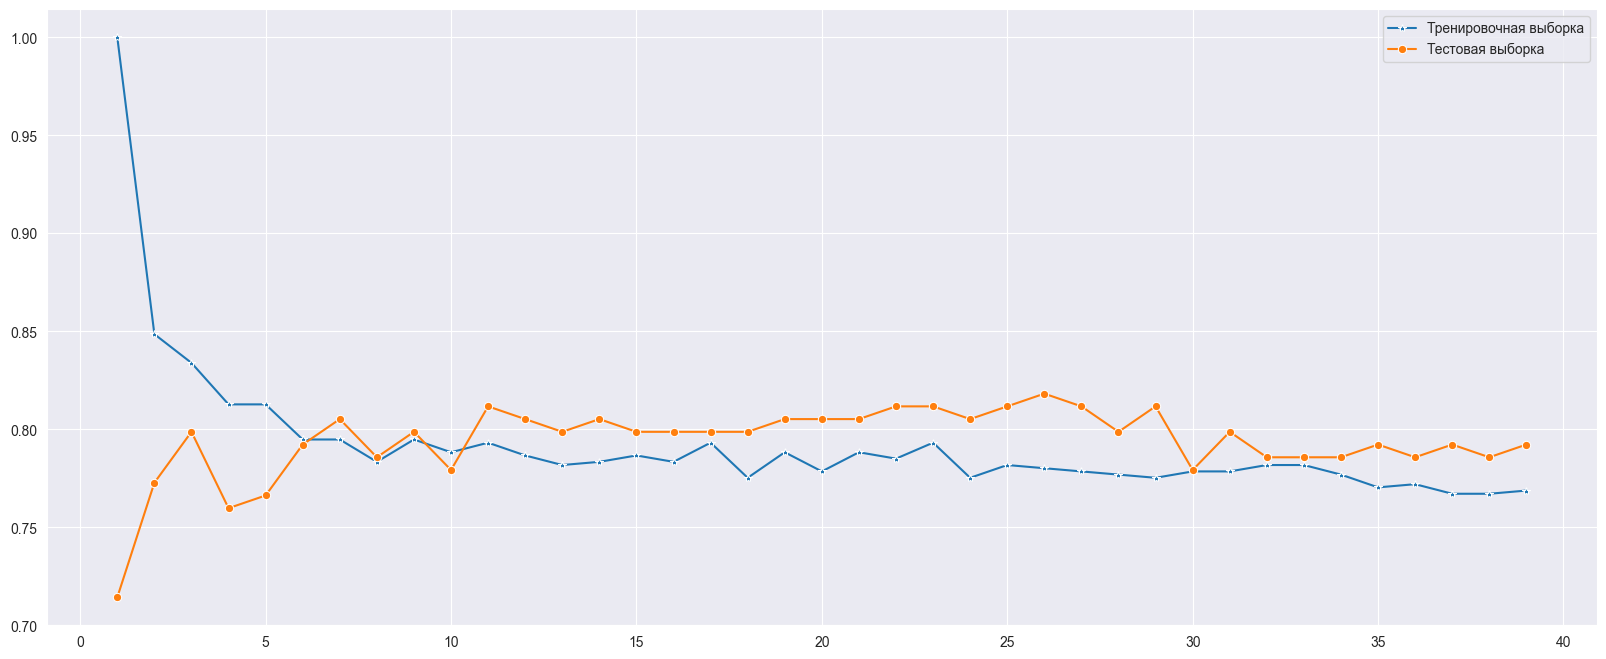

In [133]:
plt.figure(figsize=(20,8))
sns.lineplot(x = range(1,40), y = train_scores,marker='*',label='Тренировочная выборка')
sns.lineplot(x = range(1,40),y = test_scores,marker='o',label='Тестовая выборка')

In [134]:
knn = KNeighborsClassifier(26)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8181818181818182

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,94,9,103
1,19,32,51
All,113,41,154


Text(0.5, 23.52222222222222, 'Предсказанный класс')

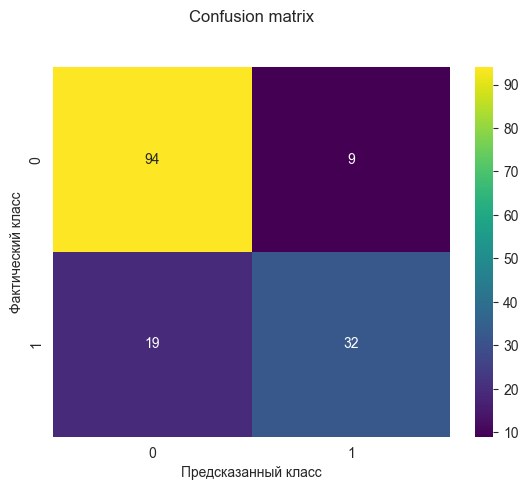

In [137]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Фактический класс')
plt.xlabel('Предсказанный класс')

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       103
           1       0.78      0.63      0.70        51

    accuracy                           0.82       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



In [139]:
from sklearn import metrics

print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the model : 0.818


In [140]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

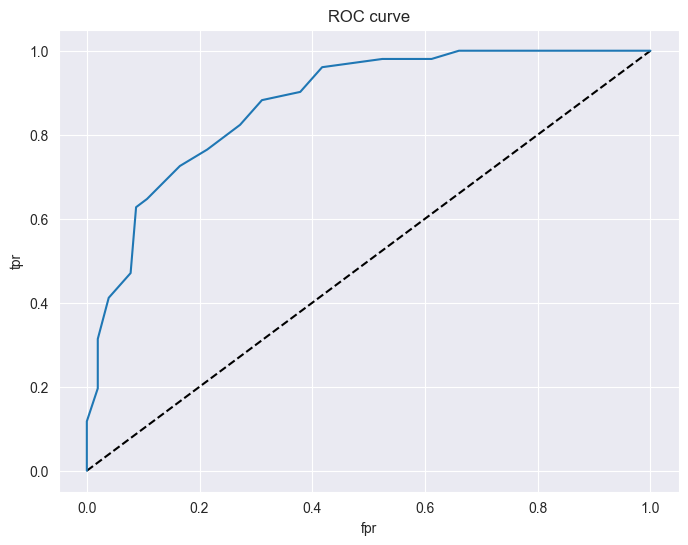

In [141]:
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [142]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8744526936988387